In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('current_Dataset')

print (dataset_path)

print("Types of classes labels found: ", len(dataset_path))

['holding-bottle', 'holding-phone', 'in-classrom']
Types of classes labels found:  3


In [ ]:
 import os

dataset_path = 'current_Dataset'  # Replace with the actual path to your dataset

class_labels = []

for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)

    if os.path.isdir(item_path):
        all_classes = os.listdir(item_path)

        for room in all_classes:
            room_path = os.path.join(item_path, room)
            class_labels.append((item, room_path))

In [ ]:
# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

           Labels                                    image
0  holding-bottle    current_Dataset\holding-bottle\b1.jpg
1  holding-bottle   current_Dataset\holding-bottle\b10.jpg
2  holding-bottle   current_Dataset\holding-bottle\b11.jpg
3  holding-bottle  current_Dataset\holding-bottle\b12.jfif
4  holding-bottle  current_Dataset\holding-bottle\b13.jfif
          Labels                                 image
278  in-classrom  current_Dataset\in-classrom\c50.jfif
279  in-classrom    current_Dataset\in-classrom\c6.jpg
280  in-classrom   current_Dataset\in-classrom\c7.jfif
281  in-classrom    current_Dataset\in-classrom\c8.jpg
282  in-classrom    current_Dataset\in-classrom\c9.jpg


In [ ]:
 # To check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  283
Labels
holding-phone     184
holding-bottle     50
in-classrom        49
Name: count, dtype: int64


In [ ]:
  import cv2
path = 'current_Dataset/'
dataset_path = os.listdir('current_Dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255].

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(283, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-bottle' 'holding-bottle'
 'holding-bottle' 'holding-bottle' 'holding-phone' 'holding-phone'
 'holding-phone' 'holding-phone' 'holding-phone' 'holding-phone'
 'holding-phone' 'holding-phone' 'holdin

In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(268, 224, 224, 3)
(268, 3)
(15, 224, 224, 3)
(15, 3)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
   model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 3)                 4053414   
 )                                                               
                                                                 
Total params: 4053414 (15.46 MB)
Trainable params: 4011391 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/30
9/9 - 405s - loss: 5.2359 - accuracy: 0.2910 - 405s/epoch - 45s/step
Epoch 2/30
9/9 - 191s - loss: 2.8627 - accuracy: 0.5858 - 191s/epoch - 21s/step
Epoch 3/30
9/9 - 266s - loss: 1.4124 - accuracy: 0.6604 - 266s/epoch - 30s/step
Epoch 4/30
9/9 - 222s - loss: 0.9052 - accuracy: 0.7239 - 222s/epoch - 25s/step
Epoch 5/30
9/9 - 240s - los

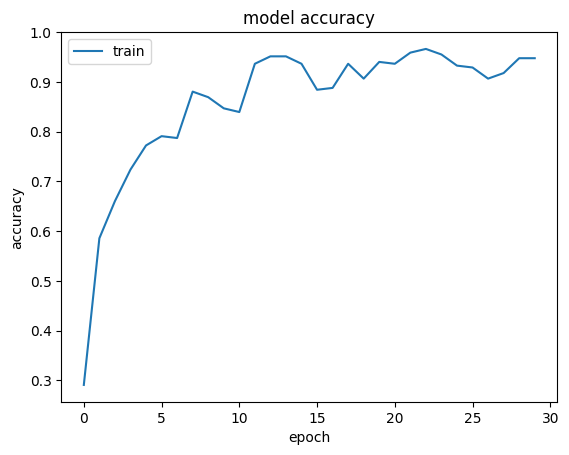

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 27s 27s/step - loss: 1.2239 - accuracy: 0.7333
Loss = 1.2239047288894653
Test Accuracy = 0.7333333492279053


Input image shape: (1, 224, 224, 3)


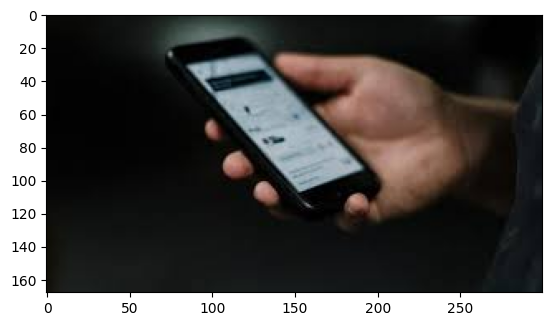

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = img_path = img_path = img_path = img_path = r'C:\Users\DELL\Desktop\current_Dataset\holding-phone\p96.jpg'



#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 1s 782ms/step


array([[0.13269432, 0.86591893, 0.0013867 ]], dtype=float32)

In [ ]:
# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]